# what is Image similarity
Image similarity in computer vision refers to the process of measuring the degree of similarity or dissimilarity between two or more images. This is an important task in many applications of computer vision, such as image retrieval, object recognition, and face recognition.

# Type of Image similarity

There are various techniques for measuring image similarity, including:

1. Pixel-based similarity: This method compares the similarity of individual pixels in two images. It is a simple and fast method, but it may not be very effective in cases where images differ significantly in terms of lighting, color, or texture.

2. Feature-based similarity: This method extracts certain features from the images, such as edges, corners, or color histograms, and then compares these features. Feature-based similarity is more effective than pixel-based similarity since it is more robust to variations in lighting and color.

3. Deep learning-based similarity: This method uses deep neural networks to extract features from images and measure their similarity. Deep learning-based similarity has become very popular in recent years due to its high accuracy and ability to handle complex and large-scale datasets.

# Find Image similarity using mean square error (MSE)

The Mean Squared Error (MSE) is a popular measurement for measuring the similarity between two images in computer vision. It calcutes the average squared difference between the pixel values of the two images. The smaller the MSE value, the more similar the images are considered to be.

MSE is a simple and fast metric for measuring image similarity, but it has some limitations. One of the limitations is that it does not take into account the structural information of the image. For example, two images may have similar structures but different colors, resulting in a large MSE value. Also, MSE is sensitive to noise and changes in illumination.

Despite these limitations, MSE is widely used in image processing and computer vision applications, such as image compression, denoising, and quality assessment. It can also be used as a baseline metric for comparing the performance of more advanced similarity metrics.

# Structural Similarity Index (SSIM)
Structural similarity is a measure used for measuring similarity between two images or signals. It is commonly used in image processing and computer vision applications to evaluate the quality of image or video compression algorithms, or to compare two images for tasks such as object recognition.

The structural similarity index (SSIM) is one of the most widely used measures of structural similarity. It compares the luminance, contrast, and structure of two images, and produces a score between 0 and 1, where 1 indicates perfect similarity.

SSIM takes into account three main factors: luminance, contrast, and structure. Luminance refers to the brightness of the image, while contrast refers to the difference in brightness between different parts of the image. Structure refers to the patterns or textures present in the image.

First Import all library 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.metrics import structural_similarity as ssim

%matplotlib inline



# Calulate mean square error

The MSE is calculated by taking the difference between the pixel values of the corresponding pixels in the two images, squaring the difference, and then averaging the squared differences over all the pixels in the image. The formula for MSE is as follows:

MSE = (1/N) * Σi,j (I1(i,j) - I2(i,j))^2

where N is the total number of pixels in the image, I1 and I2 are the two images being compared, and (i,j) are the coordinates of each pixel in the images.

In [2]:
def MeanSquareError(image1, image2):
    imageError= np.sum((image1.astype("float32")-image2.astype("float32"))**2)
    imageError = imageError/float(image1.shape[0]*image2.shape[1])
    return imageError

def ImageComparision (image1, image2):
    mean = MeanSquareError(image1, image2)
    Ssim= ssim(image1, image2)
    print(f"Mean Square Error is {mean}\n Structural Similarity Index{Ssim}")

# Take the two image as a input

In [3]:
inputImage1 = cv2.imread("../input/imagedog1/dog.jpg")
inputImage2 = cv2.imread("../input/imagedog02/dog.jpg")

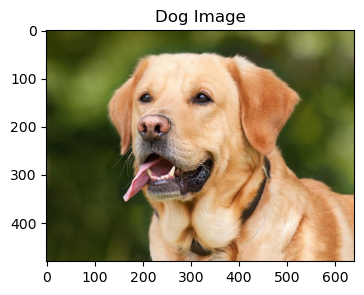

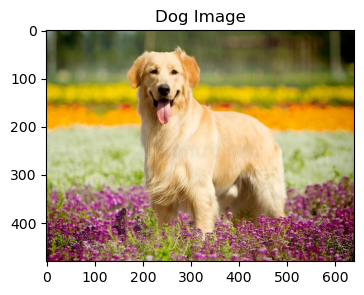

In [4]:
def display_image(imageTitle,image):
   #if len(image.shape)== 3:
    imageChange=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(4,3))
    plt.imshow(imageChange)
    plt.title(imageTitle)
    plt.show()
    
display_image("Dog Image", inputImage1)
display_image("Dog Image", inputImage2)

# Change the input Image to gray format

In [5]:
inputImage1= cv2.cvtColor(inputImage1,cv2.COLOR_BGR2GRAY)
inputImage2= cv2.cvtColor(inputImage2,cv2.COLOR_BGR2GRAY)

In [6]:
ImageComparision(inputImage1,inputImage2)

Mean Square Error is 7207.406666666667
 Structural Similarity Index0.3080410728119105


In [7]:
imageAangle = 60
imageCenter = tuple(np.array(inputImage2.shape[1::-1])/2)
imageRotation = cv2.getRotationMatrix2D(imageCenter, imageAangle, 1.0)
imageWrap = cv2.warpAffine(inputImage2, imageRotation, inputImage2.shape[1::-1], flags = cv2.INTER_LINEAR)

In [8]:
cv2.imwrite("../working/AugmentedImage.jpg",imageWrap)

True

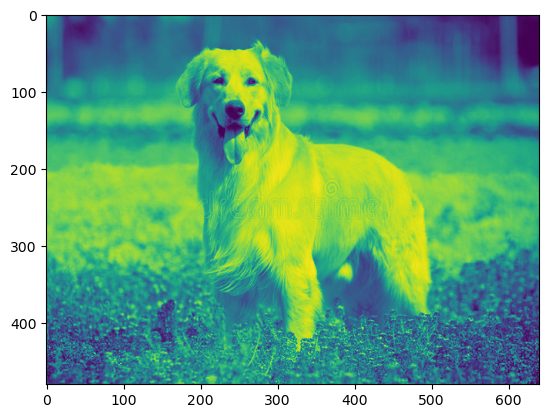

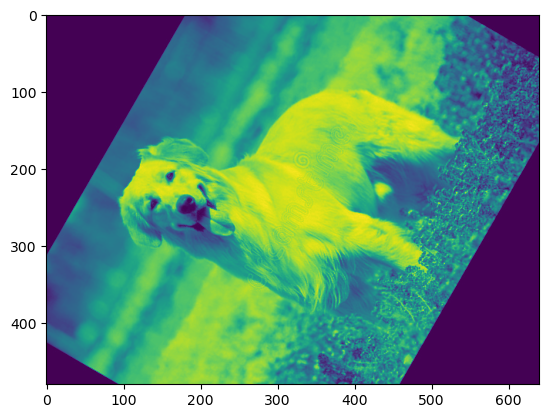

In [9]:
img = plt.imread("../working/AugmentedImage.jpg")
plt.imshow(inputImage2)
plt.show()
plt.imshow(img)
plt.show()

In [10]:
image3 = cv2.imread("../working/AugmentedImage.jpg")
image03 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)

ImageComparision(inputImage1, image03)

Mean Square Error is 8277.969166666666
 Structural Similarity Index0.23515723836086883
